In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, flip_y=0.03, n_redundant=0,
                           random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Custom Logistic Regression class
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            # Forward pass
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return [1 if i > 0.5 else 0 for i in y_pred]

In [4]:
# Train custom model
model = LogisticRegression(learning_rate=0.1, n_iterations=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


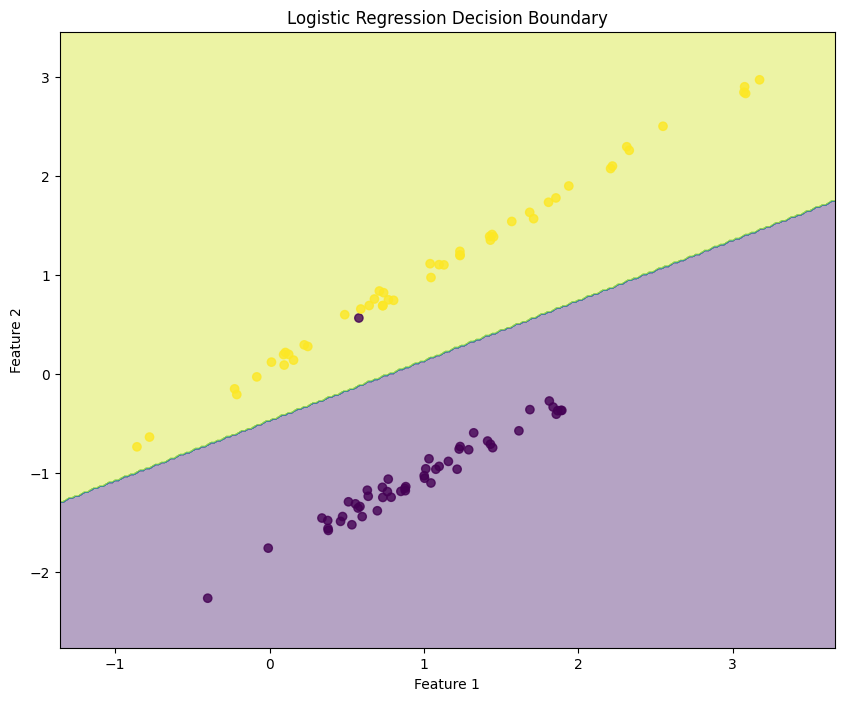

In [5]:
# Visualization
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()


plot_decision_boundary(X, y, model)

In [6]:
# Compare with sklearn implementation
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression

sklearn_model = SklearnLogisticRegression()
sklearn_model.fit(X_train, y_train)
sklearn_pred = sklearn_model.predict(X_test)
sklearn_accuracy = np.mean(sklearn_pred == y_test)
print(f'Sklearn Model Accuracy: {sklearn_accuracy:.2f}')


Sklearn Model Accuracy: 1.00
